In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
X, Y = load_Q1_dataset()
print('X: ', X.shape, 'Y: ', Y.shape)
Xtrn = X[100:, :]; Ytrn = Y[100:] #traning dataset
Xtst = X[0: 100, :]; Ytst = Y[0: 100] #test dataset

X:  (800, 9) Y:  (800,)


In [7]:
print_versions()


Python	3.9.7 <=> 3.9.2
Scipy	1.7.0 : Ok
Numpy	1.21.1 : Ok
Sklearn	0.24.2 : Ok
Pandas	1.3.1 : Ok
Matplotlib	3.4.2 : Ok
Seaborn	0.11.1 : Ok


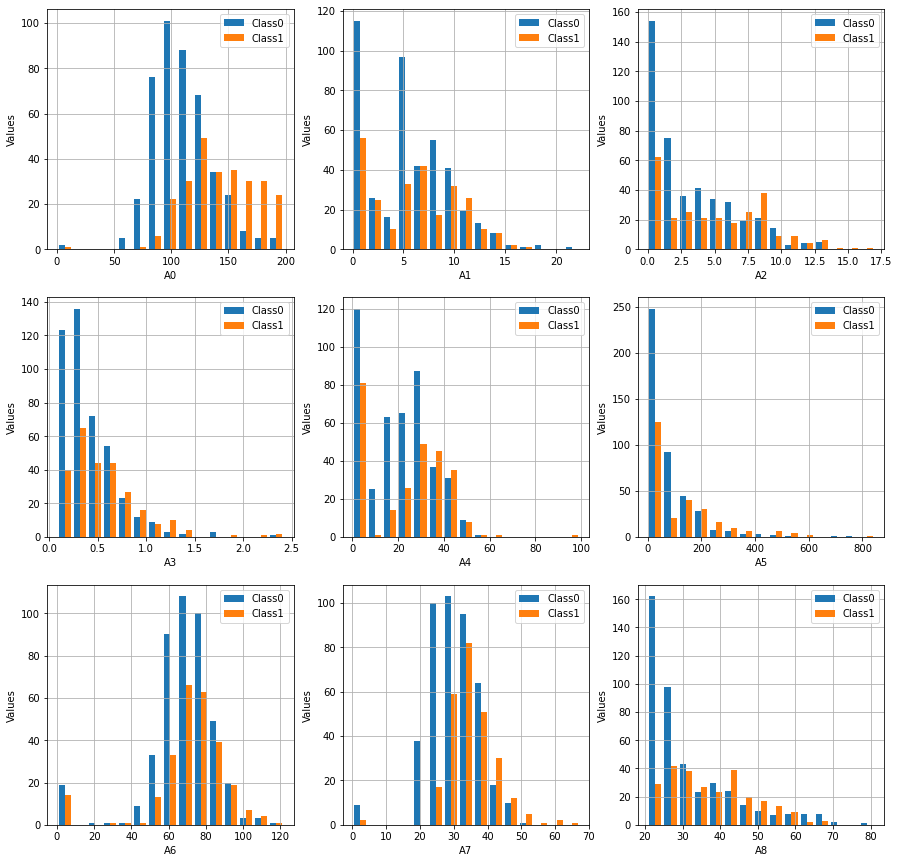

In [18]:
#Q1.1
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i in range(len(Xtrn[0])):
    Xa = []
    Xb = []
    for j in range(len(Xtrn)):
        if Ytrn[j] == 0:
            Xa.append(Xtrn[j][i])
        elif Ytrn[j] == 1:
            Xb.append(Xtrn[j][i])
        else:
            print("Unexpected class {0}".format(Ytrn[j]))
    ax_now = ax[int(i/3)][i%3]
    ax_now.hist([Xa, Xb], bins=15)
    ax_now.grid()
    ax_now.set_xlabel("A{0}".format(i))
    ax_now.set_ylabel("Values")
    ax_now.legend(["Class0", "Class1"],loc="upper right")

In [30]:
#Q1.2
def calculate_r(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = np.array([x-x_mean for x in x])
    x_diff_sqr = np.array([(x-x_mean)**2 for x in x])
    y_diff = np.array([y-y_mean for y in y])
    y_diff_sqr = np.array([(y-y_mean)**2 for y in y])
    return np.sum(x_diff*y_diff) / np.sqrt(np.sum(x_diff_sqr)*np.sum(y_diff_sqr))

r = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    r_value = calculate_r(x_ith_feature_array,Ytrn)
    # r_value = scipy.stats.pearsonr(x_ith_feature_array, Ytrn)[0]
    r.append(r_value)
    print("A{0} correlation coefficients is {1}".format(i,r_value))

A0 correlation coefficients is 0.4911758969080455
A1 correlation coefficients is 0.08740589845788756
A2 correlation coefficients is 0.22728719153958366
A3 correlation coefficients is 0.20736605298986854
A4 correlation coefficients is 0.10772034997696238
A5 correlation coefficients is 0.1856714007677247
A6 correlation coefficients is 0.07626074493410924
A7 correlation coefficients is 0.3044537676199444
A8 correlation coefficients is 0.24034733335192388
